# Lecture 6 - Principle Component Analysis

<br><br>

<b>Data generated may contain several dimensions and be quite complicated</b><br><br>

<b>However, the dimensionality of the data may far exceed the complexity of the data</b><br><br>

<b>A reduction in dimensionality often allows simpler algorithms to effectively analyze the data</b><br><br>
    
<b>A common method of data reduction is principal component analysis</b><br><br>

<b>Principal component analysis (PCA) is an often used tool that reduces the dimensionality of a problem</b><br><br>

<br><br>

<b>Consider a set of vectors which lie in $\mathbb{R}^N$ space</b><br><br>

<b>It is possible that the data is not scattered about but contains inherent structure</b><br><br>

<b>When viewed in one view the data appears scattered, but if viewed from a different orientation the data appears more organized</b><br><br>

<b>In this case the data does not need to be represented in the full $\mathbb{R}^N$ space but can viewed in a reduced dimensional space as represented by this view</b><br><br>

<b>PCA is then used to find the coordinate axes that best orient this data, thus possibly reducing the number of dimensions that are needed to describe the dat</b><br><br>

<b>In the example of this three dimensional data;</b>

$\vec{x}_{1}=\{2,1,2\}$ <br>
$\vec{x}_{2}=\{3,4,3\}$ <br>
$\vec{x}_{3}=\{5,6,5\}$ <br>

<br><br>

<b>The data is three dimensional but the first dimension and the data in the third dimension are exactly the same</b><br><br>

<b>Therefore, one dimension is redundant and so the data can be viewed in two dimensions without any loss of information</b><br><br>

<b>The example shown is quite simple and often the data redundancy is not so easily recognized</b><br><br>

<b>Every dimension contributes to the organization of the data, but some offer very small contributions</b><br><br>

<b>Thus, the process of reducing the dimensionality of the data will induce errors</b><br><br>

<b>Often these errors are not significant and do not materially change the knowledge gained through the reduction process</b><br><br>

<b>The approach of PCA is equivalent to shifting and rotating the coordinates of the space</b><br><br>

<b>The computation of the principal components uses the eigenvectors of the covariance matrix</b><br><br>

<b>It is necessary to review the covariance matrix and the importance of eigenvectors before proceeding to the determination of the principal components</b><br><br>

<br><br><br><br>

## Covariance Matrix

<br>

<b>The covariance matrix is defined as</b><br><br>

<b>$ c_{i,j} = \sum_k \left( c_i^k - \mu_i \right) \cdot \left( c_j^k - \mu_j \right)$</b><br><br>

<b>where $c_i^k$ is the $i$-th element of the $k$-th vector, and $\mu_i$ the $i$-th element of the average vector</b><br><br>

<b>The covariance matrix is symmetric and of size $D \times D$ where $D$ is the number of elements in the vector</b><br><br>

<b>The diagonal elements  are related to the variance of the elements in the vectors</b><br><br>

<b>Element $c_{ii}$ is related to the variance of the $i$-th among all of the vectors</b><br><br>

<b>The $c_{i,j}$ element is related to the co-variance between the $i$-th and $j$-th elements in the data</b> <br><br>

<b>If $c_{i,j}$ is large positive value then the $i$-th and $j$-th elements are somehow synchronized</b> <br><br>

<b>A large negative value means that an increase in one element corresponds to a decrease in the other element</b><br><br>

<b>Values of $c_{i,j}$ near 0 mean that the data elements are not linked, at least in a first order sense</b><br><br>
    
<b>Data containing vectors with independent elements will produce a diagonal covariance matrix</b><br><br>

<b>The PCA process finds a new view of the data which best diagonalizes the data</b><br><br>
    
<b>Such a perspective is the view in which the elements of the data are most independent, and therefore, this view is often the most informative view</b><br><br>

<br><br><br><br>

## Eigenvectors

<br>

<b>The computation of the principal components uses the eigenvectors of the covariance matrix. The standard eigenvector-eigenvalue equation is,</b><br><br>

<b>${\bf A} \vec v_i = \mu_i \vec v_i$</b><br><br>

<b>where <b>A</b> is a square, symmetric matrix, $\vec v_i$ is a set of eigenvectors and $\mu_i$ is a set of eigenvalues where $i=1,...,N$ and the matrix <b>A</b> is $N \times N$</b><br><br>

<b>Another property of the eigenvectors of a symmetric matrix is that they are orthonormal which means that they have a length of 1 and are perpendicular to each other</b><br><br>

<b>We will demonstrate that the length of the first eigenvector is 1 (the self dot product is 1) and that the first two vectors are perpendicular (the dot product is 0)</b><br><br>

<b>Since the eigenvectors are orthonormal, they define a coordinate system</b><br><br>

<b>Data viewed in this coordinate system produces the optimally diagonal covariance matrix</b><br><br>

<br><br>

In [5]:
# eigenvalue & eigen vector example
import numpy as np
from numpy import linalg as LA

np.set_printoptions(precision = 3)

#  find the eigenvalues of the following symetric matrix
d = np.random.ranf((3,3))
print('\nRandomly Generated Matrix:\n', d)

A = np.dot(d,d.transpose())
print('\nStarting Matrix:\n', A)

evl, evc = LA.eig(A)

print('\nEigenvalues:\n', evl)
print('\nEigenvectors:\n', evc)

#  check that they are orthonormal
dot1 = np.dot(evc[:,0], evc[:,0])
print('\nDot product should be 1 if the vectors are orthonormal:', round(dot1,2))

dot2 = np.dot(evc[:,0], evc[:,1])
dot3 = np.dot(evc[:,0], evc[:,2])
dot4 = np.dot(evc[:,1], evc[:,2])
print('\nDot product should be 0 if the vectors 1 and 2 are orthogonal:', round(dot2,2))
print('\nDot product should be 0 if the vectors 1 and 3 are orthogonal:', round(dot3,2))
print('\nDot product should be 0 if the vectors 2 and 3 are orthogonal:', round(dot4,2))

print(evc[0,:])


Randomly Generated Matrix:
 [[0.433 0.818 0.207]
 [0.904 0.024 0.118]
 [0.183 0.52  0.606]]

Starting Matrix:
 [[0.899 0.436 0.631]
 [0.436 0.832 0.25 ]
 [0.631 0.25  0.672]]

Eigenvalues:
 [1.708 0.13  0.566]

Eigenvectors:
 [[-0.685 -0.68   0.263]
 [-0.494  0.168 -0.853]
 [-0.536  0.714  0.451]]

Dot product should be 1 if the vectors are orthonormal: 1.0

Dot product should be 0 if the vectors 1 and 2 are orthogonal: 0.0

Dot product should be 0 if the vectors 1 and 3 are orthogonal: 0.0

Dot product should be 0 if the vectors 2 and 3 are orthogonal: 0.0
[-0.685 -0.68   0.263]


<br><br><br><br>

## Principal Component Analysis

<br><br>

<b>PCA can be thought of as fitting a p-dimensional ellipsoid to the data, where each axis of the ellipsoid represents a principal component</b><br><br>

<b>If some axis of the ellipsoid is small, then the variance along that axis is also small</b><br><br>

<b>To find the axes of the ellipsoid:</b><br><br>

1.  subtract the mean of each variable from the dataset to center the data around the origin.

2.  compute the covariance matrix of the data and calculate the eigenvalues and corresponding eigenvectors of this covariance matrix

3.  normalize each of the orthogonal eigenvectors to turn them into unit vectors

4.  Then unit eigenvectors can be interpreted as an axis of the ellipsoid fitted to the data. This choice of basis will transform our covariance matrix into a diagonalised form with the diagonal elements representing the variance of each axis. The proportion of the variance that each eigenvector represents can be calculated by dividing the eigenvalue corresponding to that eigenvector by the sum of all eigenvalues.

<br><br>

<b>Mathematical representation of data in matrices does tend to oppose the representation preferred in Python scripting</b><br><br>

<br><br>

<b>In theory, data is contained as columns in a matrix, whereas, Python scripts tend to store data as rows in a matrix</b><br><br>

<b>The data vectors are stored in the columns of ${\bf X}$</b><br><br>

<b>The transformation of this data into a new coordinate system is described as the multiplication of a transformation matrix ${\bf P}$ with the data</b><br><br>

<b>Thus, the data in the new space are stored as columns in ${\bf Y}$ where,</b><br><br>

<b>${\bf Y} = {\bf P X}$</b><br><br>

<b>In this case, the transformation ${\bf P}$ is the eigenvectors stored as rows</b><br><br>

<br><br>

<b>However, in Python, if the data is stored in rows then the eigenvectors are stored as columns (which is how the function returns the data)</b><br><br>

<b>The previous equation could be applied if the transposes of the matrices were consider, which can also be represented by a matrix-matrix multiplication with the order of the matrices reversed</b><br><br>

<b>So, for Python the transformation is,</b><br><br>

<b>${\bf Y} = {\bf X P}$</b><br><br>

<b>where ${\bf X}$ stores the data in rows, ${\bf P}$ stores the eigenvectors as columns, and ${\bf Y}$ is the data in the new space stored in rows</b><br><br>

<b>The steps to project the points into the new space are complete and the entire process is accomplished in the lines of code below</b><br><br>

<b>The output, is in fact, several dot products as each element in ${\bf Y}$ is,</b><br><br>

<b>$ y_{i,j} = \vec x_i \cdot \vec v_j,$</b><br><br>

<b>where $\vec x_i$ is the $i$-th data vector and $\vec v_j$ is the $j$-th eigenvector</b><br><br>

<br><br><br><br>

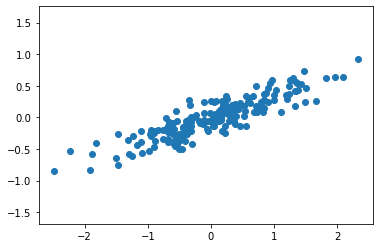

In [ ]:
#  PCA example
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal')
plt.show()

In [ ]:
#  note the nearly linear relationship of the data
#   https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

print('\nPCA Components:\n', pca.components_)

print('\nPCA Explained Variance:\n', pca.explained_variance_)

print('\nPCA Explained Ratio:\n', pca.explained_variance_ratio_)


PCA Components:
 [[-0.944 -0.329]
 [-0.329  0.944]]

PCA Explained Variance:
 [0.763 0.018]

PCA Explained Ratio:
 [0.976 0.024]


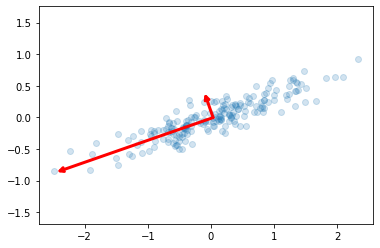

In [ ]:
#  what does this look like?
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=3,
                    shrinkA=0, shrinkB=0, color='red')
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)

plt.axis('equal')
plt.show()



 center of the ellipse: 0.013, -0.005

 width of the ellipse (semi-major axis a): 0.188

 height of the ellipse (semi-minor axis b): 1.261

 phi the tilt of the ellipse (Rotation in degrees anti-clockwise): 108.667

 circumference of the ellipse: 5.201


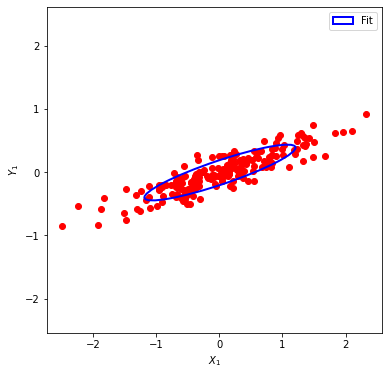

In [ ]:
#  fit an ellipse to the example data
#  pip install lsq-ellipse
%matplotlib inline
import numpy as np
from ellipse import LsqEllipse
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from scipy.special import ellipe

if __name__ == '__main__':
#  open data file and load the points
    X = np.array(list(zip(X[:, 0], X[:, 1])))
    reg = LsqEllipse().fit(X)
    center, width, height, phi = reg.as_parameters()

    print('\n', f'center of the ellipse: {center[0]:.3f}, {center[1]:.3f}')
    print('\n', f'width of the ellipse (semi-major axis a): {width:.3f}')
    print('\n', f'height of the ellipse (semi-minor axis b): {height:.3f}')
    print('\n', f'phi the tilt of the ellipse (Rotation in degrees anti-clockwise): {np.rad2deg(phi):.3f}')

    e_sq = 1.0 - height**2/width**2  # eccentricity squared
    C = 4 * width * ellipe(e_sq)  # circumference formula (Complete elliptic integral of the second kind)
    print('\n', f'circumference of the ellipse: {C:.3f}')

#  plot the data
    fig = plt.figure(figsize=(6, 6))
    ax = plt.subplot()
    ax.axis('equal')
    ax.plot(X[:, 0], X[:, 1], 'ro', zorder=1)
    ellipse = Ellipse(
        xy=center, width=2*width, height=2*height, angle=np.rad2deg(phi),
        edgecolor='b', fc='None', lw=2, label='Fit', zorder=2
    )
    ax.add_patch(ellipse)

    plt.xlabel('$X_1$')
    plt.ylabel('$Y_1$')

    plt.legend()
    plt.show()

<br><br><br><br>

<b>These vectors represent the principal axes of the data, and the length of the vector is an indication of how "important" that axis is in describing the distribution of the data—more precisely, it is a measure of the variance of the data when projected onto that axis</b><br><br>

<b>The projection of each data point onto the principal axes are the "principal components" of the data</b><br><br>

<br><br><br><br>


Original shape: (200, 2)

Transformed shape: (200, 1)


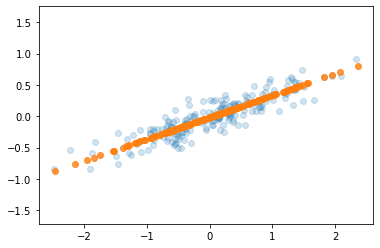

In [ ]:
#  dimensionality reduction
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print('\nOriginal shape:', X.shape)
print('\nTransformed shape:', X_pca.shape)

X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal')
plt.show()


<br><br><br><br>

### Distance Tests

<br>

<b>The projection of the points into a new space will not rearrange the points</b><br><br>

<b>The only change is that the viewer is looking at the data from a different angle</b><br><br>

<b>Thus, the distances between pairs of points will not change</b><br><br>

<b>In the PCA process, some of the dimensions will be eliminated thus inducing an error</b> <br><br>

<b>The amount of error can be quantified by measuring the relative distances between points before the reduction compared to the relative distances after the reduction</b><br><br>

<br><br>

<ipython-input-2-d81e4330e808>:13: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  amg = imageio.imread(url, mode='F')


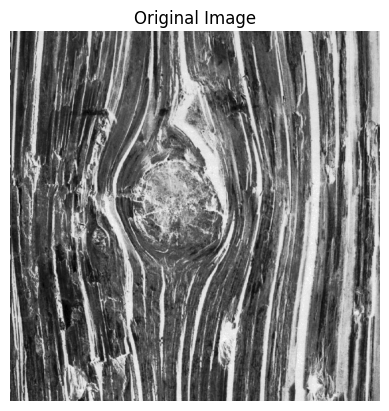

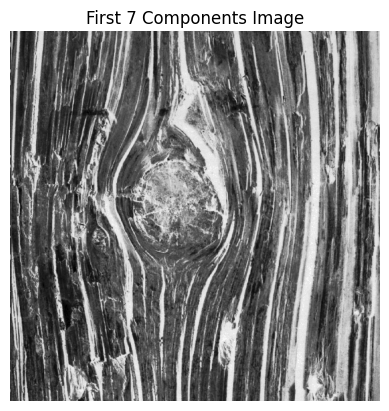

In [ ]:
#  PCA Tree Example

import matplotlib.pyplot as plt
import imageio
import numpy as np
import warnings
from PIL import Image
from urllib.request import urlopen

warnings.filterwarnings("ignore", category=RuntimeWarning)

url = 'https://raw.githubusercontent.com/joefoxva1/CDS468/master/Lecture_6_7_8_9/D72.png'
amg = imageio.imread(url, mode='F')

cv = np.cov(amg.transpose())
evl, evc = np.linalg.eig(cv)
ndata = np.dot(amg, evc[:,:2])

plt.title('Original Image')
plt.axis('off')
plt.imshow(amg, cmap='gray')
plt.show()

def ScrambleImage(mgdata):
    sdata = mgdata + 0
    np.random.shuffle(sdata)
    dists = np.sqrt(((mgdata[0]-sdata).sum(1)))
    seedrow = (dists==0).nonzero()[0]
    return sdata, seedrow

def Project(data):
    """data in rows returns matrix: projected data in rows"""
    cv = np.cov(data.transpose())
    evl, evc = np.linalg.eig(cv)
    ndata = np.dot(data, evc)
    return ndata

sdata, seedrow = ScrambleImage(amg)
ndata = Project(sdata)

"""
plt.title('Scrambled Image')
plt.axis('off')
plt.imshow(ndata, cmap='gray')
plt.show()
"""

def Unscramble(sdata, seedrow, ndata):
    V,H = sdata.shape
    udata = np.zeros((V,H))
    udata[0] = sdata[seedrow] + 0
    unused = list(range(V))
    unused.remove(seedrow)
    nndata = ndata + 0
    k = seedrow
    for i in range( 1, V ):
        dist = np.sqrt(((nndata[k]-nndata[unused])**2).sum(1))
        ag = dist.argsort()
        k = unused[ag[0]]
        udata[i] = sdata[k]
        unused.remove( k )
    return udata

udata = Unscramble(sdata, seedrow, ndata[:,:20])

plt.title('First 7 Components Image')
plt.axis('off')
plt.imshow(udata, cmap='gray')
plt.show()

<br><br><br><br>

## Eigen Faces

<br>

<b>Yes, it is as creepy as it sounds!!!</b><br><br>

<b>We will explore an example of using a PCA projection as a feature selector for facial recognition with a support vector machine</b><br><br>

<b>Let's take a look at the facial recognition problem</b><br><br>

<b>We will use the Labeled Faces in the Wild dataset, which consists of several thousand collated photos of various public figures</b><br><br>

<b>A fetcher for the dataset is built into Scikit-Learn</b><br><br>

<br><br>

In [ ]:
from sklearn.datasets import fetch_lfw_people

faces = fetch_lfw_people(min_faces_per_person=60)
print('\nFaces to be used:\n', faces.target_names)
print('\nFaces shape:', faces.images.shape)



Faces to be used:
 ['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']

Faces shape: (1348, 62, 47)


<br><br>

<b>Let's take a look at the principal axes that span this dataset</b><br><br>

<b>Because this is a large dataset, we will use RandomizedPCA—it contains a randomized method to approximate the first N principal components much more quickly than the standard PCA estimator, and thus is very useful for high-dimensional data</b><br><br>

<br><br>

In [ ]:
from sklearn.decomposition import PCA as RandomizedPCA
pca = RandomizedPCA(1348)
pca.fit(faces.data)


PCA(n_components=1348)

<br><br>

<b>Visualize the images associated with the first several principal components (these components are technically known as "eigenvectors," so these types of images are often called "eigenfaces")</b><br><br>

<b>As you can see in this figure, they are as creepy as they sound</b><br><br>

<br><br><br><br>

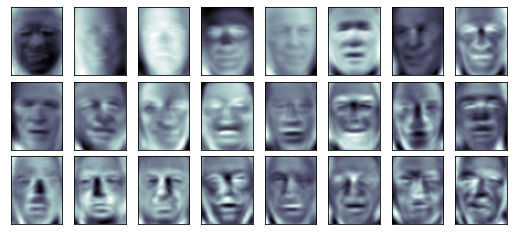

In [ ]:
fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')


<br><br>

<b>The results are very interesting, and give us insight into how the images vary: for example, the first few eigenfaces (from the top left) seem to be associated with the angle of lighting on the face, and later principal vectors seem to be picking out certain features, such as eyes, noses, and lips</b><br><br>

<b>Let's take a look at the cumulative variance of these components to see how much of the data information the projection is preserving</b><br><br>

<br><br>

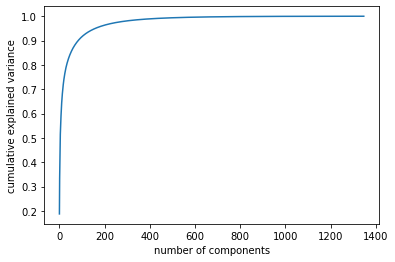

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()


<br><br>

<b>Let's look at the first 150 components</b>

<br><br>

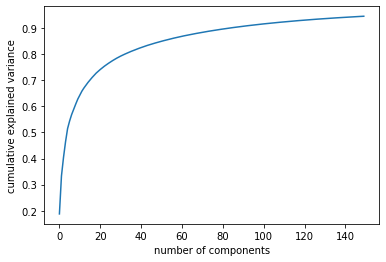

In [ ]:
pca = RandomizedPCA(150)
pca.fit(faces.data)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()


<br><br>

<b>We see that the first 150 components account for just over 95% of the variance</b><br><br>

<b>That would lead us to believe that using these 150 components, we would recover most of the essential characteristics of the data</b><br><br>

<b>To make this more concrete, we can compare the input images with the images reconstructed from these 150 components</b><br><br>

<br><br>

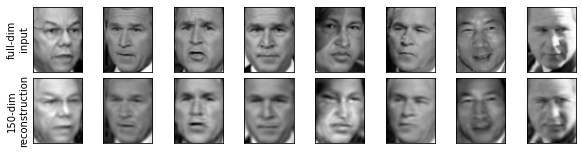

In [ ]:
# Compute the components and projected faces
pca = RandomizedPCA(150).fit(faces.data)
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

# Plot the results
fig, ax = plt.subplots(2, 8, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(8):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')

ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstruction');


<br><br>

<b>The top row here shows the input images, while the bottom row shows the reconstruction of the images from just 150 of the 1,384 initial features</b><br><br>

<b>Although it reduces the dimensionality of the data by nearly a factor of 100, the projected images contain enough information that we might, by eye, recognize the individuals in the image</b><br><br>

<b>What this means is that our classification algorithm needs to be trained on 150-dimensional data rather than 1,384-dimensional data, which depending on the particular algorithm we choose, can lead to a much more efficient classification</b><br><br>

<br><br><br><br>


## Summary

<b>The principal components are a new set of coordinates in which the data can be represented</b><br><br>

<b>These components are orthonormal vectors and are basically a rotation of the original coordinate system</b><br><br>

<b>However, the rotation minimizes the covariance matrix of the data and thus some of the coordinates may become unimportant</b><br><br>

<b>In this situation these coordinates can be discarded and thus PCA space uses fewer dimensions to represent the data than the original coordinate system</b><br><br>

<br><br><br><br>


# Homework 6

<br>
<b>
1.  Compute the covariance matrix of:
    $\mathbf{X}=\left[\begin{array}{ccc}4.0 & 2.0 & 0.60 \\ 4.2 & 2.1 & 0.59 \\ 3.9 & 2.0 & 0.58 \\ 4.3 & 2.1 & 0.62 \\ 4.1 & 2.2 & 0.63\end{array}\right]$<br><br>

2.  Using the PCA Tree Example above, calculate and display the first 1st, 3rd, and 10th dimensions/components of the image.  Discuss the differences.</b><br><br>

<b>Using the Eigen Face example, set the min_faces_per_person=55</b>

<br>
    
<b>3.  List the names of the faces used.</b><br><br>

<b>4.  Show the subplots for each face of the first 3 principle components using 100 dimensions.</b><br><br>

<b>5.  Show the final plot of the faces for the first 100 dimensions.</b>
